In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 57.4 MB/s eta 0:00:00


In [ ]:
import rasterio
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Open the image using rasterio
img = rasterio.open('/content/drive/MyDrive/Satellite Images New/Landcover_2048_Faislabad_2020.tif')
img.shape

(2064, 2049)

In [ ]:
from rasterio.windows import Window
import rasterio
import os

def crop_tiff_to_size(tiff_path, output_path, target_size):
    with rasterio.open(tiff_path) as src:
        width, height = src.width, src.height

        # Calculate cropping window
        start_x = (width - target_size) // 2
        start_y = (height - target_size) // 2
        window = Window(start_x, start_y, target_size, target_size)

        # Read data from window
        data = src.read(window=window)

        # Update metadata for new size
        kwargs = src.meta.copy()
        kwargs.update({
            'height': target_size,
            'width': target_size,
            'transform': src.window_transform(window)
        })

        # Write cropped data to new file
        with rasterio.open(output_path, 'w', **kwargs) as dst:
            dst.write(data)

        print(f"Cropped TIFF saved to {output_path}")

def process_all_tiffs(input_dir, output_dir):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Supported sizes
    supported_sizes = [256, 768, 1024, 1792, 2048, 2560]

    for file_name in os.listdir(input_dir):
        if file_name.endswith('.tif'):
            # Extract size from filename
            for size in supported_sizes:
                if f"_{size}_" in file_name:
                    tiff_path = os.path.join(input_dir, file_name)
                    output_path = os.path.join(output_dir, file_name)
                    crop_tiff_to_size(tiff_path, output_path, size)
                    break

# Paths
input_directory = '/content/drive/MyDrive/Satellite Images New/'
output_directory = '/content/drive/MyDrive/Cropped Data'

# Process all TIFF files
process_all_tiffs(input_directory, output_directory)


Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_dubai_2000.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_dubai_2020.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Median Image_1024_2020_dubai.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Median Image_1024_2000_dubai.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Median_Image_1024_Islamabad2000.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_Islamabad_2020.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Median_Image_1024_Islamabad2020.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_Islamabad_2000.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_KPK_2000.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Median_Image_1024_KPK2020.tif
Cropped TIFF saved to /content/drive/MyDrive/Cropped Data/Landcover_1024_KPK_2020.tif
Cropped TI

In [ ]:
img = rasterio.open('/content/drive/MyDrive/Cropped Data/Landcover_1792_China_2000.tif')
img.shape

(1792, 1792)

In [ ]:
import os
import shutil

def move_images(source_dir, target_dir):
    # Ensure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Iterate over all files in the source directory
    for file_name in os.listdir(source_dir):
        # Check if the file name contains the word 'Landcover'
        if '2020' in file_name:
            # Construct full file path
            source_file_path = os.path.join(source_dir, file_name)
            target_file_path = os.path.join(target_dir, file_name)

            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
            print(f"Moved {file_name} to {target_dir}")

# Define source and target directories
source_directory = '/content/drive/MyDrive/Cropped Data/'
target_directory = '/content/drive/MyDrive/Cropped Data 2020/'

# Move images
move_images(source_directory, target_directory)


Moved Median Image_1024_2020_dubai.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1024_Islamabad2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1024_KPK2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_768_PortQasim_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_2560_Lahore_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_2048_Faislabad_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_2048_Quetta_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_768_isbAirport_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1792_AbuDhabi_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1792_Qatar_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1792_Gujranwala_2020.tif to /content/drive/MyDrive/Cropped Data 2020/
Moved Median_Image_1792_Islamabad_2020.tif to /content/

In [ ]:
from rasterio.windows import Window
from PIL import Image
import numpy as np
import rasterio
import os

patch_size = 256  # Patch size in pixels

def create_png_patches(tiff_path, output_dir, patch_size, region_number):
    with rasterio.open(tiff_path) as src:
        width, height = src.width, src.height

        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)
        num_patches_x = int(np.ceil(width / patch_size))
        num_patches_y = int(np.ceil(height / patch_size))

        for i in range(num_patches_x):
            for j in range(num_patches_y):
                # Calculate the window coordinates
                window = Window(i * patch_size, j * patch_size, patch_size, patch_size)
                # Read the patch data
                patch_data = src.read(window=window)

                patch_height, patch_width = patch_data.shape[1], patch_data.shape[2]
                print(f"Patch {i}_{j} dimensions: {patch_width}x{patch_height}")

                # Convert the patch to an image format
                patch_data = np.moveaxis(patch_data, 0, -1)  # Convert from (bands, height, width) to (height, width, bands)

                # If patch_data has more than 3 bands, take only the first 3 for RGB
                if patch_data.shape[2] > 3:
                    patch_data = patch_data[:, :, :3]

                if patch_data.dtype != np.uint8:
                    patch_data = np.uint8(patch_data / np.max(patch_data) * 255)

                patch_filename = os.path.join(output_dir, f"patch_{region_number}_{i}_{j}.png")
                patch_image = Image.fromarray(patch_data)
                patch_image.save(patch_filename)
                print(f"Saved {patch_filename}")

def process_all_cropped_images(cropped_dir, output_dir, patch_size):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over all TIFF files in the cropped directory
    for file_name in os.listdir(cropped_dir):
        if file_name.endswith('.tif'):
            region_number = file_name.split('_')[-1].split('.')[0]
            print(region_number)

            tiff_path = os.path.join(cropped_dir, file_name)

            # Create patches for the current TIFF image
            create_png_patches(tiff_path, output_dir, patch_size, region_number)
cropped_directory = '/content/drive/MyDrive/Cropped Data 2020'
output_directory = '/content/drive/MyDrive/New Dataset/B'

process_all_cropped_images(cropped_directory, output_directory, patch_size)


1
Patch 0_0 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_0_0.png
Patch 0_1 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_0_1.png
Patch 0_2 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_0_2.png
Patch 0_3 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_0_3.png
Patch 1_0 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_1_0.png
Patch 1_1 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_1_1.png
Patch 1_2 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_1_2.png
Patch 1_3 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_1_3.png
Patch 2_0 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_2_0.png
Patch 2_1 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_2_1.png
Patch 2_2 dimensions: 256x256
Saved /content/drive/MyDrive/New Dataset/B/patch_1_2_2.png
Patch 2_3 dimension

In [ ]:
import rasterio
def load_landcover(file_path):
    with rasterio.open(file_path) as src:
        landcover_data = src.read()  # Read all bands
    return landcover_data
# Load landcover data for 2020 and 2021
landcover_1_2020 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_4_2020.tif')
landcover_1_2021 = load_landcover('/content/drive/MyDrive/landcovers_2560_cropped/landcover_4_2021.tif')


In [ ]:
import rasterio
import numpy as np
import os
import cv2  # Make sure OpenCV is installed
from rasterio.windows import Window
from PIL import Image

patch_size = 256  # Size of patches

def load_landcover(file_path):
    with rasterio.open(file_path) as src:
        landcover_data = src.read(1)  # Read only the first band
    return landcover_data

def create_change_map(landcover_2000, landcover_2020):
    change_map = np.where(landcover_2020 != landcover_2000, 255, 0).astype(np.uint8)  # Convert directly to binary change map
    return change_map

def save_change_map(change_map, output_dir, image_num):
    os.makedirs(output_dir, exist_ok=True)
    change_map_path = os.path.join(output_dir, f"change_map_{image_num}.png")
    # Save the change map
    cv2.imwrite(change_map_path, change_map)
    print(f"Saved change map {change_map_path}")
    return change_map_path

def create_png_patches(tiff_path, output_dir, patch_size, image_num):
    with rasterio.open(tiff_path) as src:
        width, height = src.width, src.height

        # Calculate number of patches
        num_patches_x = int(np.ceil(width / patch_size))
        num_patches_y = int(np.ceil(height / patch_size))

        os.makedirs(output_dir, exist_ok=True)

        for i in range(num_patches_x):
            for j in range(num_patches_y):
                # Calculate the window coordinates
                window = Window(i * patch_size, j * patch_size, patch_size, patch_size)
                patch_data = src.read(1, window=window)

                patch_data_normalized = (patch_data / np.max(np.abs(patch_data)) * 255).astype(np.uint8)

                # Create and save the patch image
                patch_filename = os.path.join(output_dir, f'patch_{image_num}_{i}_{j}.png')
                cv2.imwrite(patch_filename, patch_data_normalized)
                print(f"Saved patch {patch_filename}")

def process_landcover_pairs(input_dir_2000, input_dir_2020, output_change_maps_dir, output_patches_dir, patch_size):
    """Process landcover pairs, create change maps, and save patches."""
    # Get sorted list of files for both years
    files_2000 = sorted([f for f in os.listdir(input_dir_2000) if f.endswith('.tif')])
    files_2020 = sorted([f for f in os.listdir(input_dir_2020) if f.endswith('.tif')])

    for file_2000, file_2020 in zip(files_2000, files_2020):
        # Construct file paths
        path_2000 = os.path.join(input_dir_2000, file_2000)
        path_2020 = os.path.join(input_dir_2020, file_2020)

        image_num = file_2000.split('_')[1].split('.')[0]
        landcover_2000 = load_landcover(path_2000)
        landcover_2020 = load_landcover(path_2020)

        # Create change map
        change_map = create_change_map(landcover_2000, landcover_2020)

        # Save the change map
        change_map_path = save_change_map(change_map, output_change_maps_dir, image_num)

        # Create patches from the change map
        create_png_patches(change_map_path, output_patches_dir, patch_size, image_num)

# Paths to directories
input_dir_2000 = '/content/drive/MyDrive/Land Covers New'
input_dir_2020 = '/content/drive/MyDrive/Land Covers New 2020'
output_change_maps_dir = '/content/drive/MyDrive/Label Maps'
output_patches_dir = '/content/drive/MyDrive/New Dataset/label'

# Process the land cover pairs and create change maps and patches
process_landcover_pairs(input_dir_2000, input_dir_2020, output_change_maps_dir, output_patches_dir, patch_size)


Saved change map /content/drive/MyDrive/Label Maps/change_map_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_0_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_0_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_0_2.png


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_0_3.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_1_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_1_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_1_2.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_1_3.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_2_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_2_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_2_2.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_2_3.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_3_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_3_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_3_2.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_1_3_3.png
Saved change map /content/drive/MyDrive/Label Maps/change_map_10.png
Saved patch /content/drive/MyDrive

<ipython-input-69-f6aad3e3f2cb>:50: RuntimeWarning: invalid value encountered in divide
  patch_data_normalized = (patch_data / np.max(np.abs(patch_data)) * 255).astype(np.uint8)
<ipython-input-69-f6aad3e3f2cb>:50: RuntimeWarning: invalid value encountered in cast
  patch_data_normalized = (patch_data / np.max(np.abs(patch_data)) * 255).astype(np.uint8)


Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_2_4.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_2_5.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_2_6.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_2.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_3.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_4.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_5.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_3_6.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_4_0.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_4_1.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_4_2.png
Saved patch /content/drive/MyDrive/New Dataset/label/patch_14_4_3.png
Saved patch /content

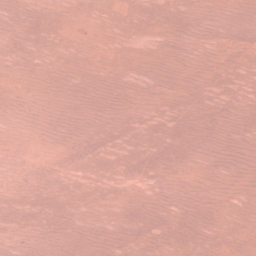

In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/New Dataset/A/patch_1_1_3.png')
img

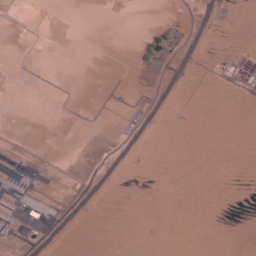

In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/New Dataset/B/patch_1_1_3.png')
img

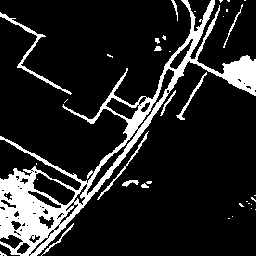

In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/New Dataset/label/patch_1_1_3.png')
img